<a target="_blank" href="https://colab.research.google.com/github/ares2012/temp/blob/master/Open_in_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

https://tomoyo.ivyro.net/123/wiki.php/TeX_%EB%B0%8F_LaTeX_%EC%88%98%EC%8B%9D_%EB%AC%B8%EB%B2%95

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##### 1106(목)
What is Machine learning?
1. Arthur Samuel(1959)
A field of study that lets computers have the ability to learn by themselves **without being explicitly programmed.**
2. Tom Mitchell(1998)
A study of computer algorithms that allow <font color='blue'>computer program to automatically improve through experience(data).</span>

*   Input+Program>Conventional Prgramming>Output
*   Input+Output>Machine Learning>Program(f:x->y)


1. Supervised Learning(With Teacher/Label+Direct feedback)
*   Regression(continuous)+Classification(discrete/categorical)
*   pairs(Input-Output)
*   labeling(costly but necessary)
*   현장 실무용

2. **Unsupervised Learning**(Without Teacher/Label+Without feedback):
*   mimimum human supervision
*   Clustering(similarities)+Outlier Detection
*   Dimensionality Reduction: hidden correlation, noise elimination, interpretation+visualization
*   Density estimation(GAN)
*   연구용

3. Reinforcement Learning(With Teacher/Label+InDirect feedback):
*   Robot Navigation+Real-time decisions
*   Agent+Action+State+Reward in an environment
*   Game+Autonomeous Driving/Cruise




##### 1111(월)
History of Neural Networks
*   1943: Electronic Brain
*   1957: Perceptron (AND, OR gate)
*   1960: Golden Age
*   1969: XOR Problem
*   1970: Dark Age(AI Winter)
*   1986: Multi-layered Perceptron(Backpropagation)
*   1995: Surport Vector Machine
*   2006: Deep Neural Network(Pretraining) > AlexNet

Why Deep Learning?
*   GPU, Big Data, Algorithm
*   Geoffrey Everest Hinton, Yann LeCun, Yoshua Bengio
*   AI>ML>DL(Feature extraction+Model): End-to-End learning based on huge data
*   Convolutional Neural Network(CNN): ImageNet
*   Recurrent Neural Nework(RNN)

Supervised Learning
1.   Collecting Data: Acquisition(Discovery, Augmentation, Generation)
    *   Labeling
    *   Extracting Features
2.   Choosing a ML Model
3.   Optimizing Parameters: Finding the optimal(best) parameter, y=f(x;W)
    *   Error Function: Error(W) = ∑{y-f(x;W)}<sup>2</sup>
    *   How to find the function of minimizing the error?
    *   Simple Linear Regression
    *   Gradient Descent Method
    

##### 1114(목)

Challenges of Optimization Problem
*   Quadratic functions in many variables with ill-conditioned
*   Convex functions without closed form solution (ex. logistic regression)
*   Nonlinear functions: Partial derivatives ares not linear.

Approximate methods
*   Gradient descent
*   (Gauss-)Newton method
*   Levenberg-Karquardt
*   Conjugate gradient

Gradient Descent
*   gradient: vector with partial derivative
*   E(W+$\nabla$W)<E(W)
*   W<sub>t+1</sub> = W<sub>t</sub> - $\eta*\frac{\partial E}{\partial W}$

"https://developers.google.com/machine-learning/crash-course/linear-regression/"

Convex Function
*   Global-minima
*   Local-minima
*   Saddle point

Analytical solution
*   well-understood form: W=(X<sup>T</sup>X)$^{-1}$X<sup>T</sup>y
*   exact solution

Numerical solution
*   making guesses: Gradient Descent
*   well enough
*   Batch, mini-Batch, Stochastic GD













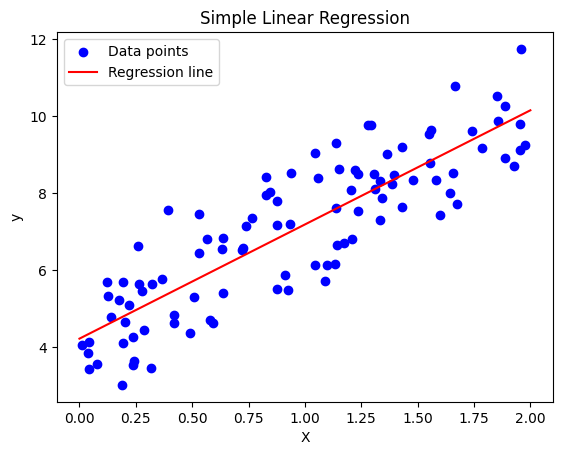

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the output
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_predict, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

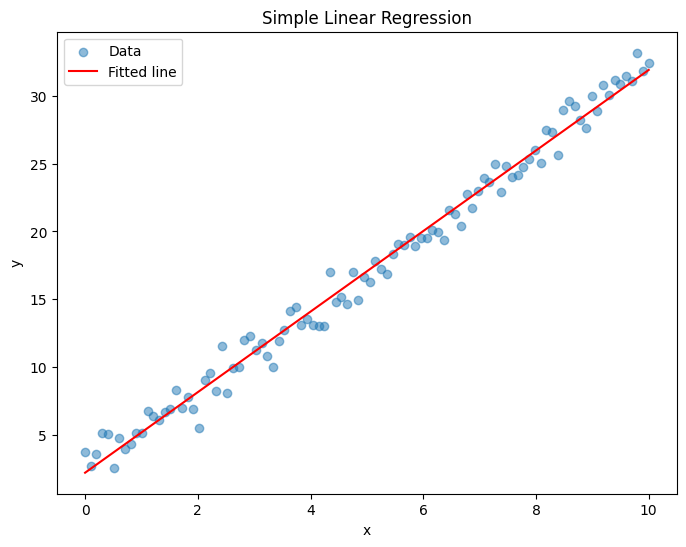

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a linear function
def linear_func(x, a, b):
    return a * x + b

# Generate some synthetic data points with noise
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
y_data = 3 * x_data + 2 + np.random.normal(size=x_data.size)

# Use scipy.optimize.curve_fit to fit the linear function to the data points
params, covariance = curve_fit(linear_func, x_data, y_data)
a, b = params

# Plot the original data points and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data', alpha=0.5)
plt.plot(x_data, linear_func(x_data, a, b), color='red', label='Fitted line')
plt.title('Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
def objective_function(x):
    return x**2 + 4*x + 4

# Initial guess
x0 = 0

# Perform the optimization
result = minimize(objective_function, x0)

# Print the result
print("Optimal value:", result.fun)
print("Optimal point:", result.x)

Optimal value: 0.0
Optimal point: [-2.00000002]


In [11]:
from scipy.optimize import linprog

# Coefficients of the objective function
c = [-1, 4]

# Coefficients of the inequality constraints
A = [[-3, 1], [1, 2]]
b = [6, 4]

# Bounds for variables
x0_bounds = (None, None)
x1_bounds = (None, None)

# Perform the optimization
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

# Print the result
print("Optimal value:", result.fun)
print("Optimal point:", result.x)

Optimal value: 1.9999999999999998
Optimal point: [-2.  0.]


<ipython-input-11-68b3db437934>:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


In [12]:
import numpy as np

# Define the function to be minimized
def objective_function(x):
    return x**2 + 4*x + 4

# Define the gradient of the function
def gradient(x):
    return 2*x + 4

# Gradient descent algorithm
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    for _ in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
    return x

# Parameters
starting_point = 0
learning_rate = 0.1
num_iterations = 100

# Perform the optimization
optimal_point = gradient_descent(starting_point, learning_rate, num_iterations)

# Print the result
print("Optimal point:", optimal_point)
print("Optimal value:", objective_function(optimal_point))

Optimal point: -1.9999999995925928
Optimal value: 0.0


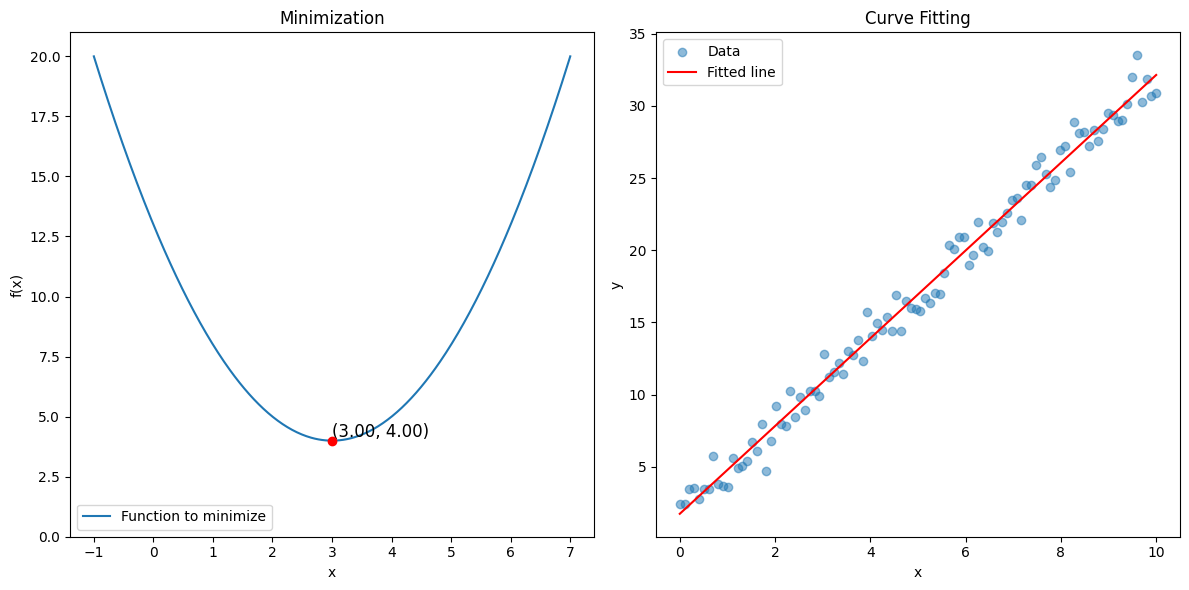

In [9]:
import numpy as np
from scipy.optimize import minimize, curve_fit
import matplotlib.pyplot as plt

# Define a simple quadratic function to minimize
def func_to_minimize(x):
    return (x - 3) ** 2 + 4

# Use scipy.optimize.minimize to find the minimum
result = minimize(func_to_minimize, x0=0)
min_x = result.x[0]
min_y = func_to_minimize(min_x)

# Define a function to fit
def linear_func(x, a, b):
    return a * x + b

# Generate some data points with noise
x_data = np.linspace(0, 10, 100)
y_data = 3 * x_data + 2 + np.random.normal(size=x_data.size)

# Use scipy.optimize.curve_fit to fit the data
params, covariance = curve_fit(linear_func, x_data, y_data)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the function to minimize
x_vals = np.linspace(-1, 7, 400)
y_vals = func_to_minimize(x_vals)
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='Function to minimize')
plt.scatter(min_x, min_y, color='red', zorder=5)
plt.text(min_x, min_y, f'({min_x:.2f}, {min_y:.2f})', fontsize=12, verticalalignment='bottom')
plt.title('Minimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, np.max(y_vals)+1)
plt.legend()

# Plot the data points and the fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_data, y_data, label='Data', alpha=0.5)
plt.plot(x_data, linear_func(x_data, *params), color='red', label='Fitted line')
plt.title('Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

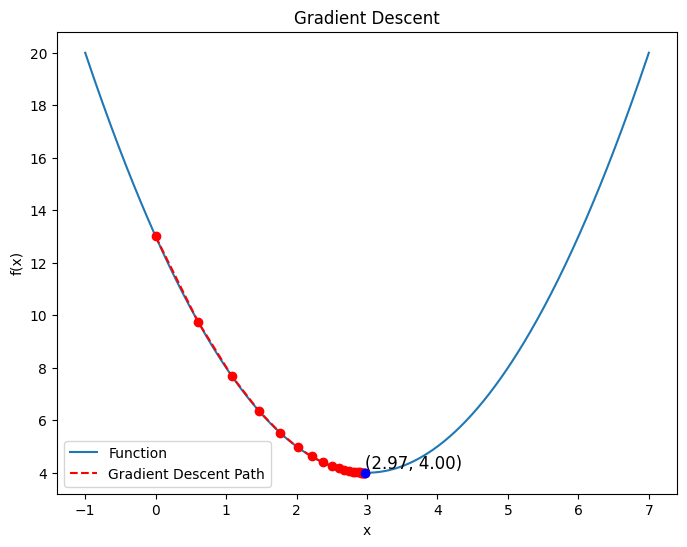

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic function and its gradient
def func(x):
    return (x - 3) ** 2 + 4

def grad(x):
    return 2 * (x - 3)

# Implement the gradient descent algorithm
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    path = [x]
    for _ in range(num_iterations):
        x = x - learning_rate * grad(x)
        path.append(x)
    return x, path

# Use gradient descent to find the minimum
starting_point = 0
learning_rate = 0.1
num_iterations = 20
min_x, path = gradient_descent(starting_point, learning_rate, num_iterations)
min_y = func(min_x)

# Plot the function and the path taken by gradient descent
x_vals = np.linspace(-1, 7, 400)
y_vals = func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.scatter(path, [func(x) for x in path], color='red', zorder=5)
plt.plot(path, [func(x) for x in path], color='red', linestyle='--', label='Gradient Descent Path')
plt.scatter(min_x, min_y, color='blue', zorder=5)
plt.text(min_x, min_y, f'({min_x:.2f}, {min_y:.2f})', fontsize=12, verticalalignment='bottom')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

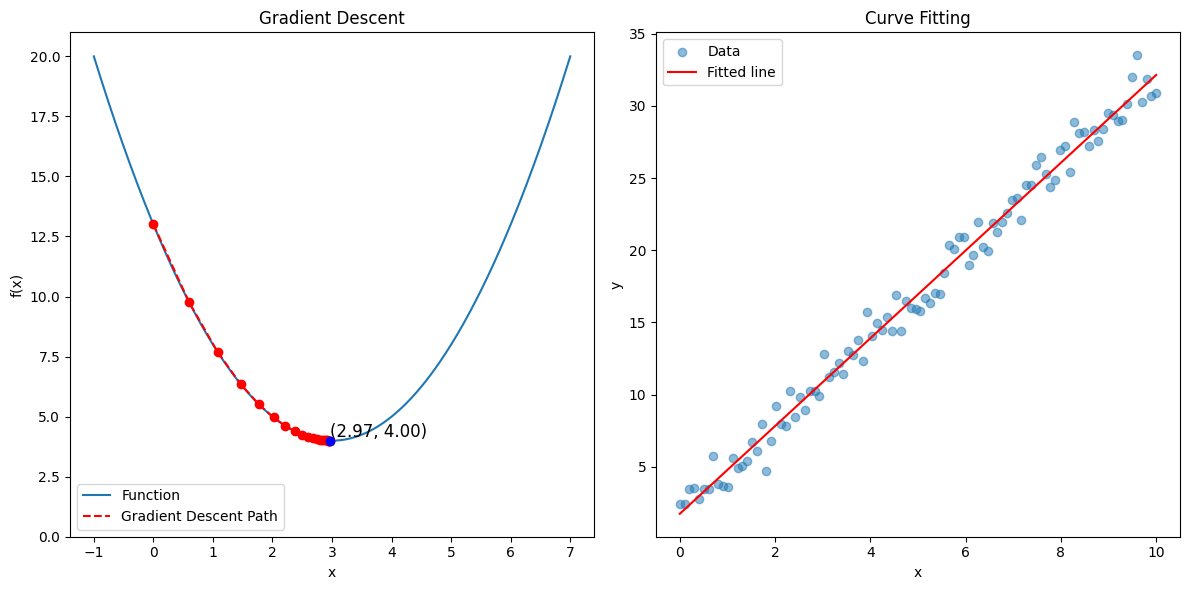

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='Function')
plt.scatter(path, [func(x) for x in path], color='red', zorder=5)
plt.plot(path, [func(x) for x in path], color='red', linestyle='--', label='Gradient Descent Path')
plt.scatter(min_x, min_y, color='blue', zorder=5)
plt.text(min_x, min_y, f'({min_x:.2f}, {min_y:.2f})', fontsize=12, verticalalignment='bottom')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.ylim(0, np.max(y_vals)+1)
plt.legend()

# Plot the data points and the fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_data, y_data, label='Data', alpha=0.5)
plt.plot(x_data, linear_func(x_data, *params), color='red', label='Fitted line')
plt.title('Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

-0.9877228259830095
-0.9944212548012273
-0.9976968386659578
-0.9992215392272802
-0.9998439215665044
-0.999999790544285
-0.9999171247668845
-0.9997172328089229
-0.9994653949687275
-0.9991968075835175
-0.9989302117801105
-0.9986752259341446
-0.998436375369148
-0.9982153467209949
-0.998012266574182
-0.9978264332663715
-0.997656737115384
-0.9975019007293621
-0.9973606144026738
-0.9972316099812567
-0.9971136986125609
-0.997005787417995
-0.9969068840476394
-0.9968160944739138
-0.9967326172238894
[-1.16699288 -1.23553123]


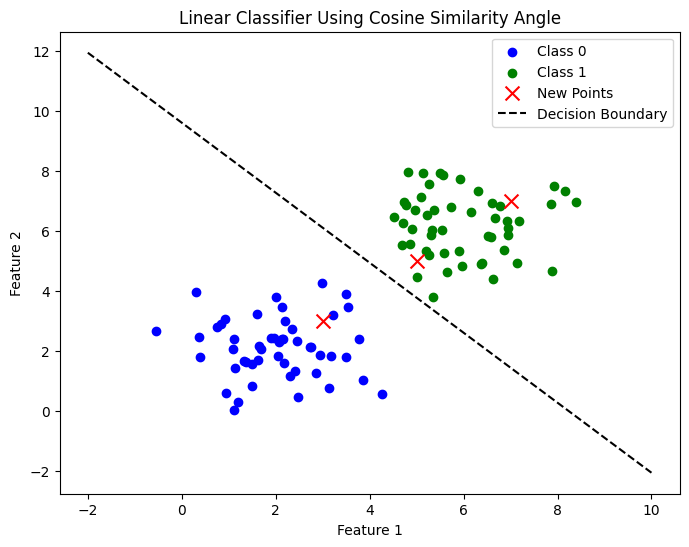

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset with labeled points
np.random.seed(0)
data_class_0 = np.random.randn(50, 2) + np.array([2, 2])
data_class_1 = np.random.randn(50, 2) + np.array([6, 6])
data = np.vstack((data_class_0, data_class_1))
labels = np.array([0] * 50 + [1] * 50)

# Define a function to compute the angle of cosine similarity
def cosine_similarity_angle(a, b):
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return cos_sim#np.arccos(np.clip(cos_sim, -1.0, 1.0))

# Implement a linear classifier that optimizes weights using the angle of cosine similarity
class CosineSimilarityAngleClassifier:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def fit(self, X, y):
        # Normalize the data
        X_normalized = X / np.linalg.norm(X, axis=1, keepdims=True)
        #print(X_normalized)
        # Initialize weights
        self.weights = np.random.randn(X.shape[1])
        # Gradient descent to optimize weights
        for _ in range(self.num_iterations):
            gradients = np.zeros_like(self.weights)
            for i in range(X.shape[0]):
                angle = cosine_similarity_angle(X_normalized[i], self.weights)
                if y[i] == 1:
                    gradients += angle * X_normalized[i]
                else:
                    gradients -= angle * X_normalized[i]
            self.weights += self.learning_rate * gradients
            print(angle)
            #print(self.weights)

    def predict(self, X):
        # Normalize the data
        X_normalized = X / np.linalg.norm(X, axis=1, keepdims=True)
        # Compute cosine similarity with the weights
        similarities = X_normalized @ self.weights
        return (similarities > 0).astype(int)

# Train the classifier
classifier = CosineSimilarityAngleClassifier(learning_rate=0.01, num_iterations=25)
classifier.fit(data, labels)
print(classifier.weights)

# Classify new data points
new_points = np.array([[3, 3], [5, 5], [7, 7]])
predicted_labels = classifier.predict(new_points)

# Plot the dataset, decision boundary, and classification results
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label='Class 0', color='blue')
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label='Class 1', color='green')
plt.scatter(new_points[:, 0], new_points[:, 1], label='New Points', color='red', marker='x', s=100)

# Plot decision boundary
x_vals = np.linspace(-2, 10, 100)
#y_vals = -(classifier.weights[0] * x_vals)/classifier.weights[1]
y_vals = classifier.weights[0]*(x_vals-5) + classifier.weights[1]+5
plt.plot(x_vals, y_vals, label='Decision Boundary', color='black', linestyle='--')

plt.title('Linear Classifier Using Cosine Similarity Angle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

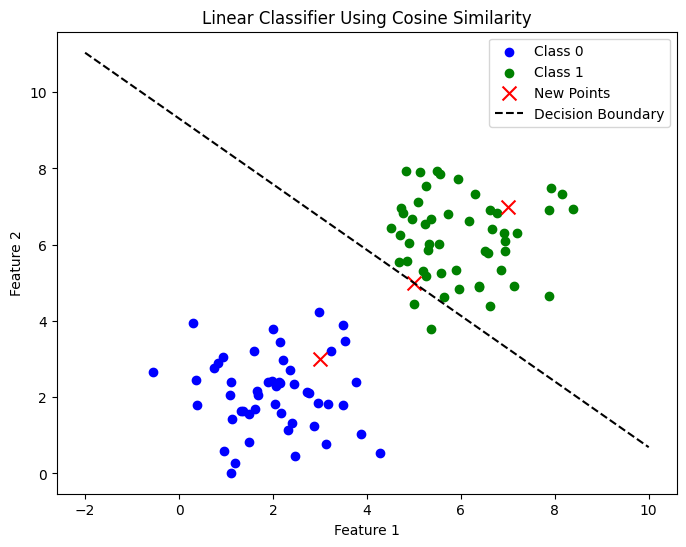

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Create a simple dataset with labeled points
np.random.seed(0)
data_class_0 = np.random.randn(50, 2) + np.array([2, 2])
data_class_1 = np.random.randn(50, 2) + np.array([6, 6])
data = np.vstack((data_class_0, data_class_1))
labels = np.array([0] * 50 + [1] * 50)

# Define a function to compute cosine similarity
def compute_cosine_similarity(a, b):
    return cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0]

# Implement a linear classifier using cosine similarity
class CosineSimilarityClassifier:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Normalize the data
        X_normalized = X / np.linalg.norm(X, axis=1, keepdims=True)
        # Compute the weights using the mean of each class
        self.weights = np.mean(X_normalized[y == 1], axis=0) - np.mean(X_normalized[y == 0], axis=0)

    def predict(self, X):
        # Normalize the data
        X_normalized = X / np.linalg.norm(X, axis=1, keepdims=True)
        # Compute cosine similarity with the weights
        similarities = X_normalized @ self.weights
        return (similarities > 0).astype(int)

# Train the classifier
classifier = CosineSimilarityClassifier()
classifier.fit(data, labels)

# Classify new data points
new_points = np.array([[3, 3], [5, 5], [7, 7]])
predicted_labels = classifier.predict(new_points)

# Plot the dataset, decision boundary, and classification results
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label='Class 0', color='blue')
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label='Class 1', color='green')
plt.scatter(new_points[:, 0], new_points[:, 1], label='New Points', color='red', marker='x', s=100)

# Plot decision boundary
x_vals = np.linspace(-2, 10, 100)
#y_vals = -(classifier.weights[0] * x_vals) / classifier.weights[1]
y_vals = -classifier.weights[0]*(x_vals-5) / classifier.weights[1] + 5
plt.plot(x_vals, y_vals, label='Decision Boundary', color='black', linestyle='--')

plt.title('Linear Classifier Using Cosine Similarity')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()